# Multiple Linear Regression


In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [18]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#ct =ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
#X= np.array(ct.fit_transform(X), dtype=np.float)

dataset.loc[:, 'State'] = labelencoder.fit_transform(dataset.loc[:, 'State'])
ct =ColumnTransformer([('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
X= np.array(ct.fit_transform(dataset), dtype=np.float)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
#Split x axis and y axis
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [22]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [21]:
pd.DataFrame(X)

,0,1,2,3
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0
5,131876.90,99814.71,362861.36,2.0
6,134615.46,147198.87,127716.82,0.0
7,130298.13,145530.06,323876.68,1.0
8,120542.52,148718.95,311613.29,2.0
9,123334.88,108679.17,304981.62,0.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [25]:
y_pred

array([173118.7005394 ,  98172.6733074 ,  45305.59598306,  69775.17738243,
       147453.73526556, 116944.41251121, 117414.71098522, 119780.5387134 ,
        63912.9198538 , 115077.92163494])

In [26]:
y_test

array([166187.94,  97483.56,  42559.73,  81229.06, 129917.04, 105008.31,
       118474.03, 111313.02,  65200.33, 122776.86])

In [27]:
import sklearn.metrics as ms
from scipy import stats
print(stats.pearsonr(y_test,y_pred)[0])

0.9769122066832229


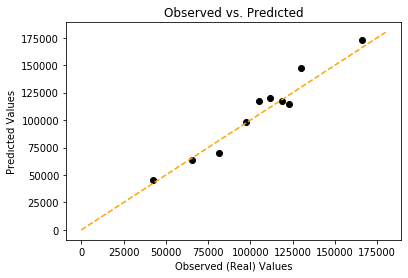

In [28]:
# Visualising the Test set results
plt.scatter(y_test, y_pred, color = 'black')
plt.plot([0,180000], [0,180000],'--', color = 'orange')
plt.title('Observed vs. Predıcted')
plt.xlabel('Observed (Real) Values')
plt.ylabel('Predicted Values')
plt.show()

In [30]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.29e-31
Time:                        18:50:42   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.744e+04   3008.359      9.122      0.000    2.14e+04    3.35e+04
x1          2.744e+04   3008.359      9.122      0.000    2.14e+04    3.35e+04
x2             0.8621      0.030     28.589      0.000       0.801       0.923
x3            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     3.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.75e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""